In [16]:
import torch
import torchvision

import matplotlib.pyplot as plt
import torch
import torchvision

from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets, transforms

from torch import nn
from torchvision import transforms

from torchinfo import summary

from HelperFunctions import download_data, set_seeds, plot_loss_curves

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [8]:
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip", destination="pizza_steak_sushi")

train_dir = image_path / "train"
test_dir = image_path / "test"
     
train_dir, test_dir

[INFO] Did not find data\pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [29]:
IMG_SIZE = 224
transform = transforms.Compose([transforms.Resize((IMG_SIZE, IMG_SIZE)), transforms.ToTensor()])

In [30]:
BATCH_SIZE = 32

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_datset = datasets.ImageFolder(test_dir, transform=transform)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)
test_dataloder = DataLoader(dataset=test_datset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

len(train_dataset),len(test_datset),len(train_dataloader), len(test_dataloder)

(225, 75, 8, 3)

(-0.5, 223.5, 223.5, -0.5)

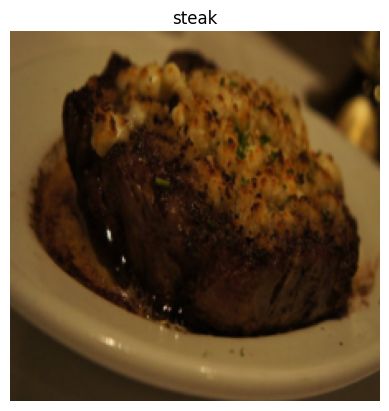

In [38]:
image_batch, label_batch = next(iter(train_dataloader))
image, label = image_batch[0], label_batch[0]
image.shape, label

import matplotlib.pyplot as plt

plt.imshow(image.permute(1,2,0))
plt.title(train_dataset.classes[label])
plt.axis(False)